# Visualization (시각화)
> 데이터분석 및 보고에 필요한 시각화 패키지를 알아보고 실제 데이터로 시각화 예제를 다루어봅니다.  
데이터 시각화는 데이터분석 과정에서 단순히 데이터를 살펴보는데 그치지 않고 다양한 분석 가능성을 보여줍니다.  
또한 3자에게 설명을 함에 있어서도 데이터시각화는 굉장히 설득력있는 리포팅을 가능하게 해줍니다.

## seaborn
> - 많은 데이터분석가들이 주로 사용하는 시각화 라이브러리  
> - 다양한 형태의 시각화도구를 제공. 
> - 기본적인 심미성이 뛰어나 특별한 옵션 설정을 하지 않아도 예쁜 그래프 출력이 가능하다.

In [1]:
# 패키지 설치 아나콘다 환경은 이미 seaborn 설치해둔 상태
# !pip install seaborn

# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화의 numpy
import seaborn as sns # plt를 기반으로 한 범용적인 시각화 패키지
plt.rcParams['axes.unicode_minus'] = False # 한글폰트에서 마이너스 깨짐 해결
plt.rcParams['font.family'] = 'gulim' # 한글폰트 설정

In [2]:
# 데이터 로딩
df = pd.read_csv('./data/energy1.csv', encoding='cp949')
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


### countplot (막대그래프)

<AxesSubplot:xlabel='풍속(m/s)', ylabel='count'>

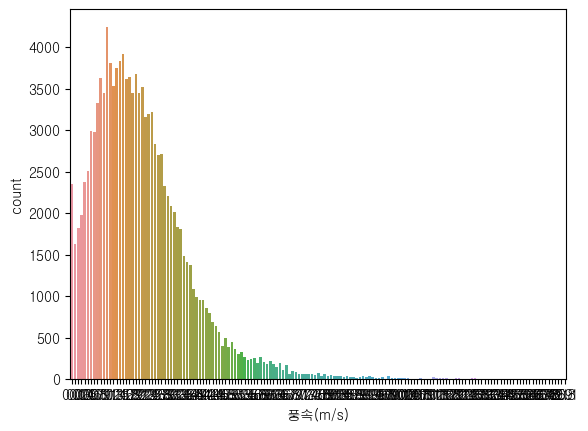

In [4]:
# 쉬운 방법으로 barplot 구현이 가능하다.
# 카테고리컬 (범주형 데이터)의 고윳값 크기 비교
sns.countplot(data=df, x='풍속(m/s)')

### histplot (히스토그램)

<AxesSubplot:xlabel='기온(°C)', ylabel='Count'>

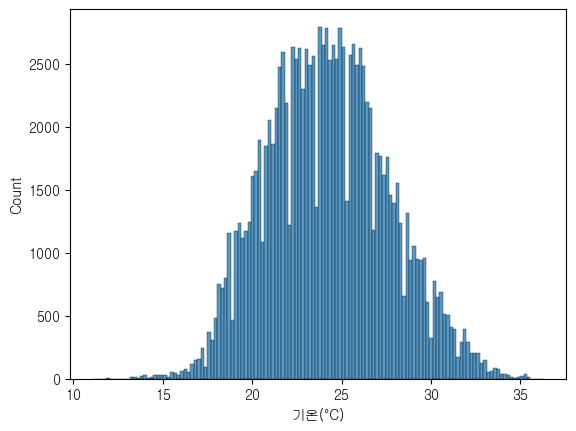

In [5]:
# 연속형 데이터에 적용 해당 데이터의 분포를 확인하고자 할 때 사용합니다.
# 데이터를 등구간으로 나누고 해당 구간에 데이터의 빈도를 나타내는 밀도로 표현이 가능합니다.
sns.histplot(data=df, x='기온(°C)')

### scatterplot (산점도)

In [6]:
df.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

<AxesSubplot:xlabel='기온(°C)', ylabel='전력사용량(kWh)'>

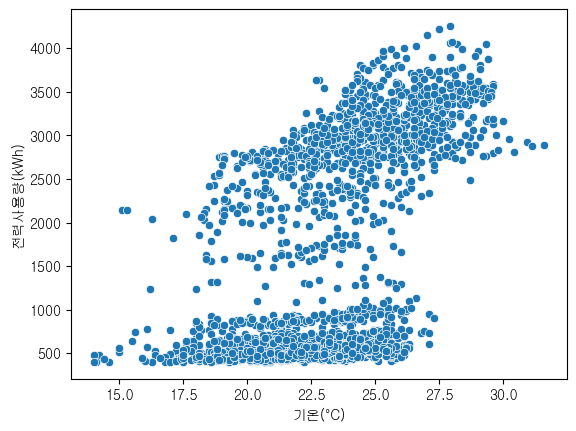

In [21]:
# 대상 변수가 2개, x축, y축에 각각의 변수를 위치시키고 데이터를 점으로 표현하는 시각화 툴
# 변수 둘다 연속형 --> 보이는 패턴이 잘 보입니다.
# 데이터분석가들이 굉장히 많이 사용합니다.
# 상관관계, 상관계수, 변수간 관계 분석, 분포도 확인이 가능, 분석용 시각화 툴로 사용
# sns.scatterplot(data=df, x='기온(°C)', y='전력사용량(kWh)', hue='num')
# 점하나 ---> 데이터 샘플, 관측치 하나 122400 개 점이 찍힌 상황
# hue 범례표시 각각의 점관측치를 변수 기준으로 색 구분을 나누어 줌
sns.scatterplot(data=df.loc[df['num'] == 12], x='기온(°C)', y='전력사용량(kWh)')

### boxplot

In [16]:
# scatterplot과 비슷한 방법의 시각화 도구
# 대상이 되는 2개의 변수를 각각 x, y축에 위치 스캐터와 동일
# x축 범주형, y축 데이터 연속형이 좋음
# y축 데이터의 분포를 사분위수에 따른 박스형태로 구현

Index(['num', 'date_time', '전력사용량', '기온', '풍속', '습도', '강수량', '일조', '비전기냉방설비운영',
       '태양광보유', '전력사용량(Wh)'],
      dtype='object')

In [22]:
df.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

<AxesSubplot:xlabel='태양광보유', ylabel='전력사용량(kWh)'>

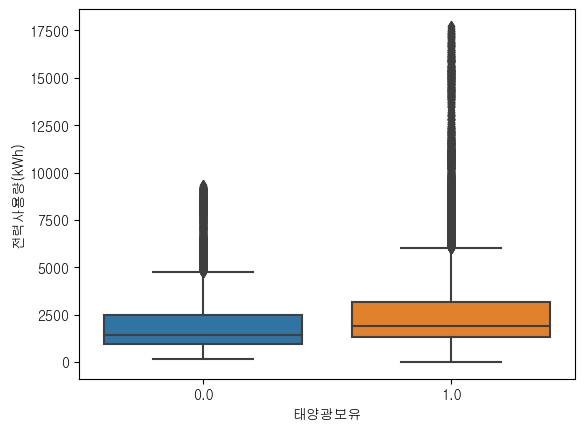

In [26]:
# 굉장히 많이 사용
# 각각의 box하나당 해당 데이터의 사분위수, 중앙값, 최대, 최소값을 표기한다.
sns.boxplot(data=df, x='태양광보유', y='전력사용량(kWh)')
# 박스 사분위수 25%, 중앙값, 75% 값
# 박스 밖으로 iqr 사분위수의 1.5 박스 상단, 하단에 위치한 직선 ---> boxplot 이상치를 판단

### pairplot
> 각 변수간 상관관계를 확인하는 scatterplot의 확장버전  
데이터프레임의 모든 변수에 대한 상관관계를 그리드 형태의 scatter로 표현합니다.

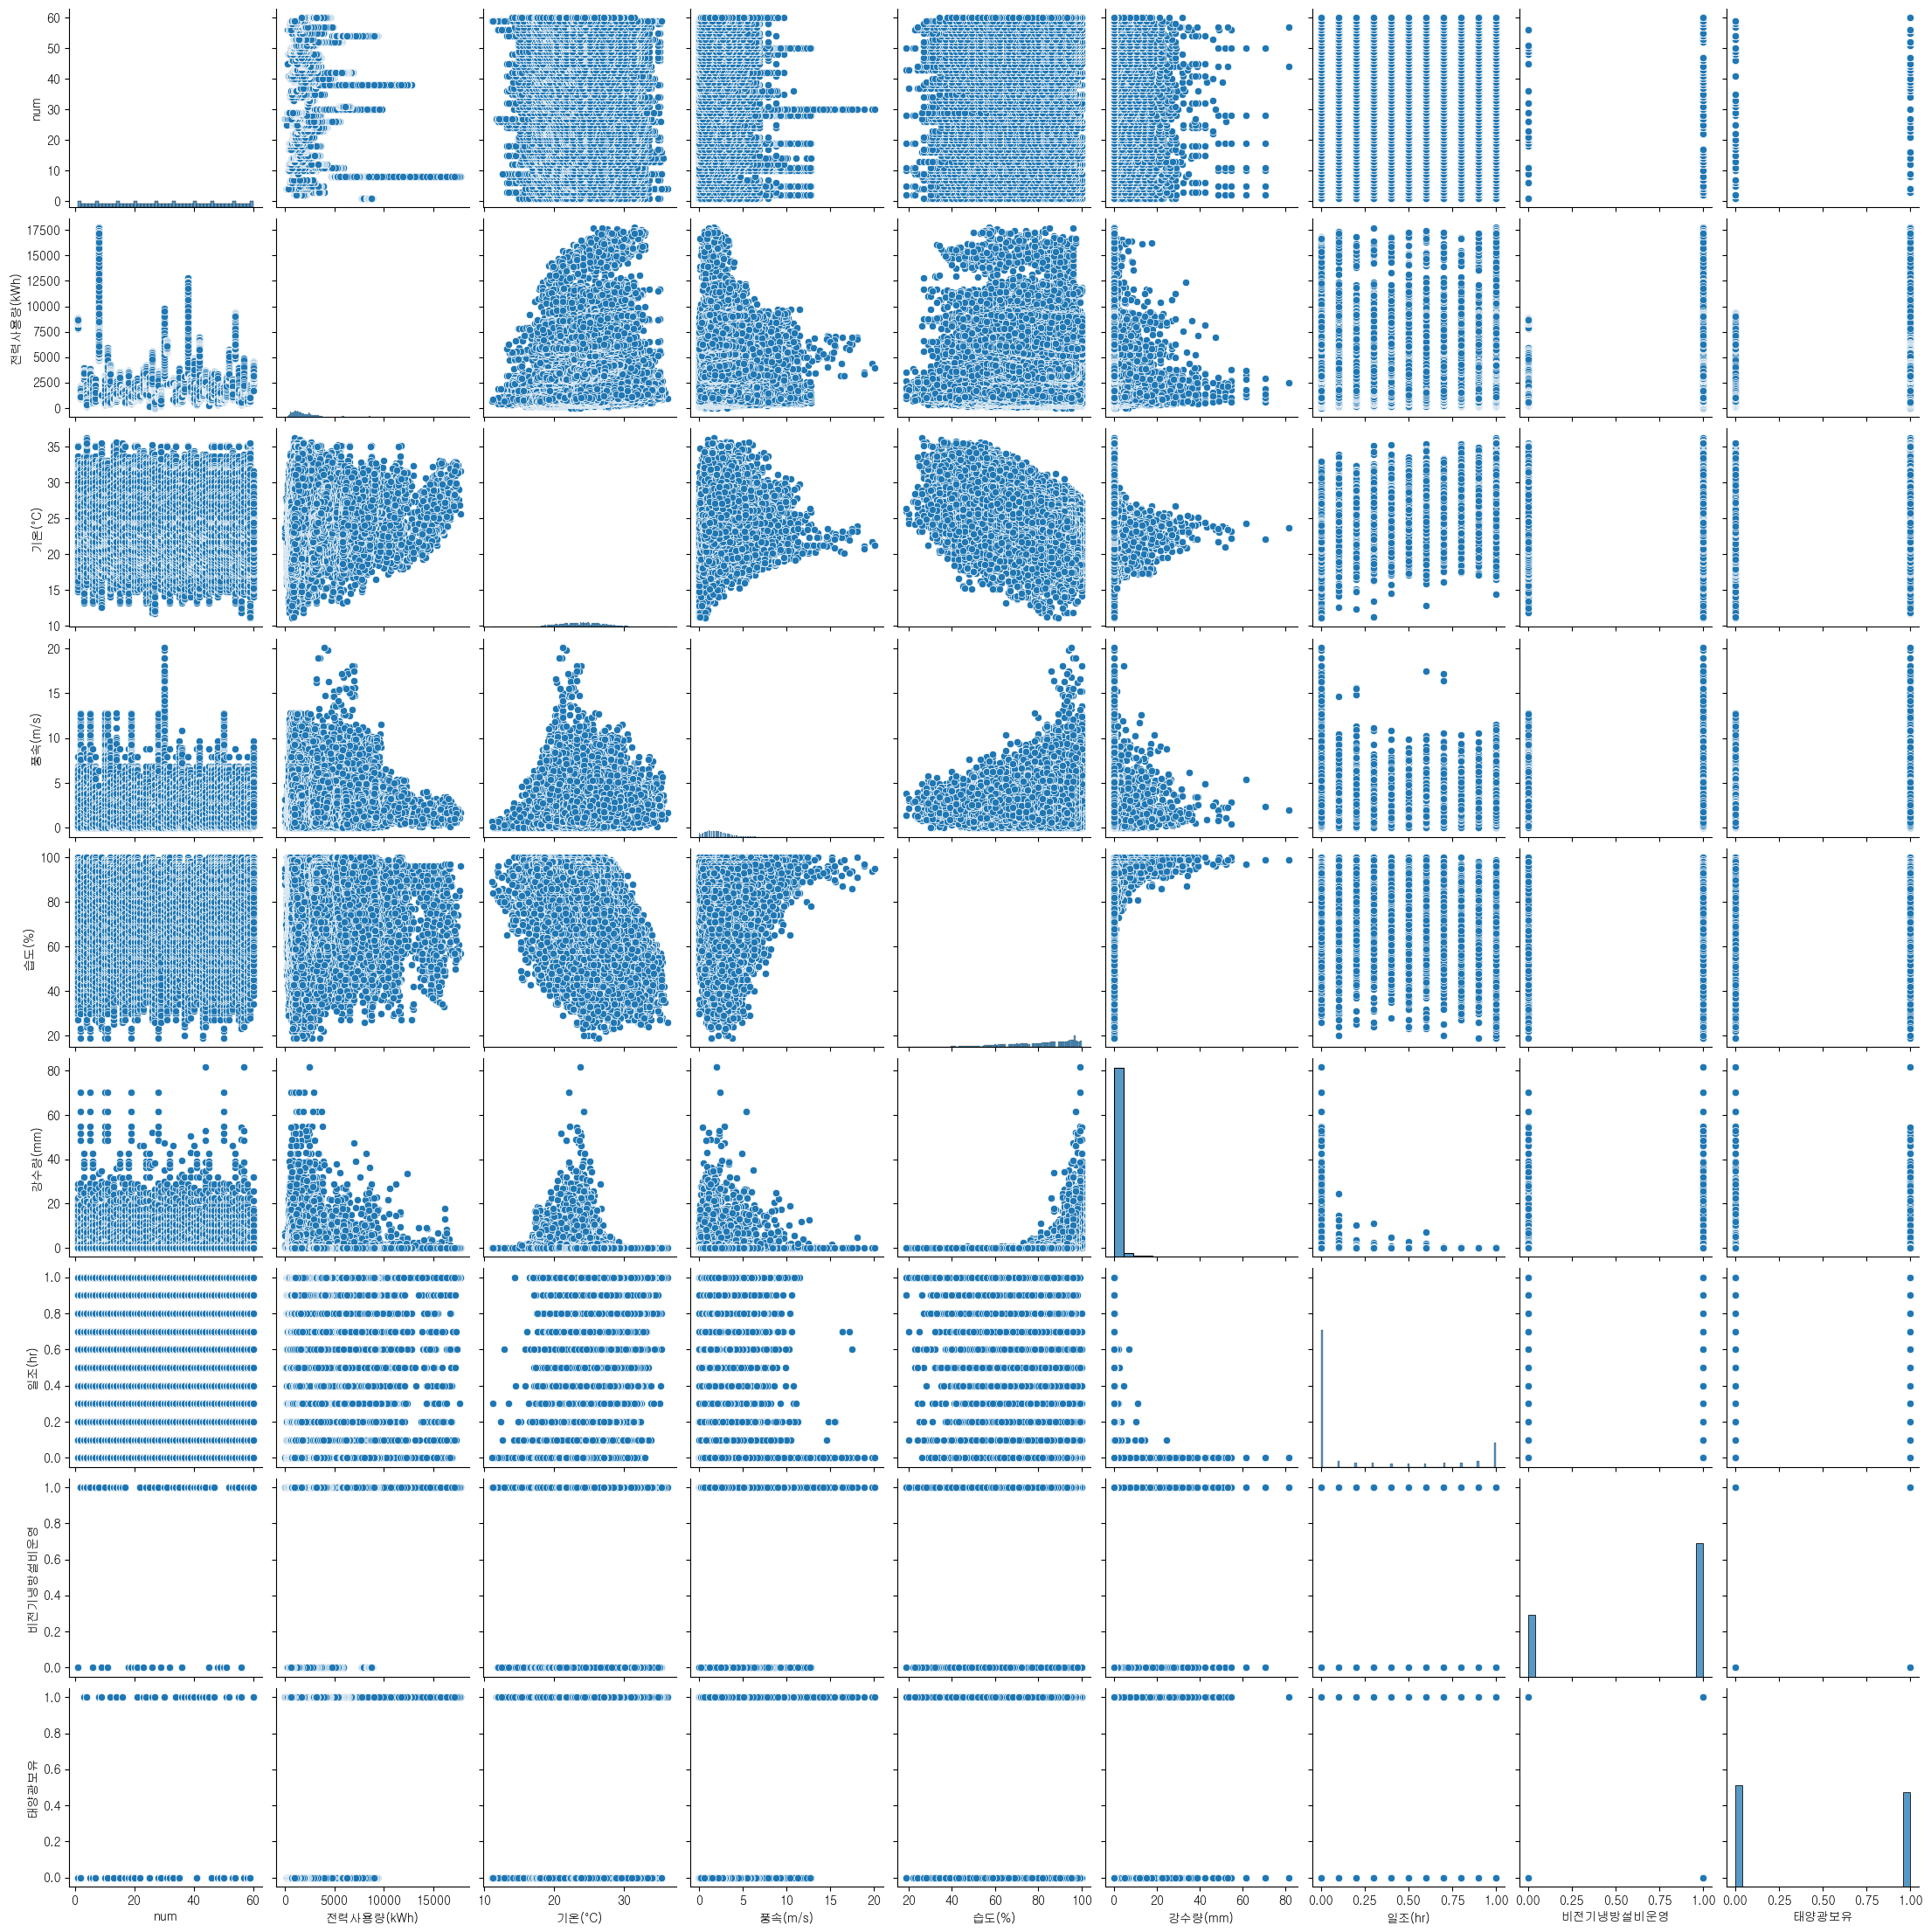

In [27]:
# 각 컬럼간 모든 scatter plot을 그리는 pairplot
sns.pairplot(data=df)

### heatmap(열지도)
> 각 변수간 상관관계를 모두 확인하고자 하는 목적은 pairplot과 같음  
다만 scatterplot 형태가 아닌 상관계수를 계산하여 열지도로 표현  
각 변수간 관계를 한눈에 보기 좋은 형태

In [29]:
df.corr()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
num,1.000000,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,0.061031,0.099181
전력사용량(kWh),-0.063193,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,0.150799,0.116344
기온(°C),0.000363,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,0.019067,0.025865
풍속(m/s),-0.052184,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,0.006275,-0.076560
습도(%),0.005379,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-0.031405,-0.020657
강수량(mm),-0.004673,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-0.003560,-0.016685
일조(hr),-0.013685,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-0.005695,-0.008412
비전기냉방설비운영,0.061031,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000,0.084842
태양광보유,0.099181,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,0.084842,1.000000


<AxesSubplot:>

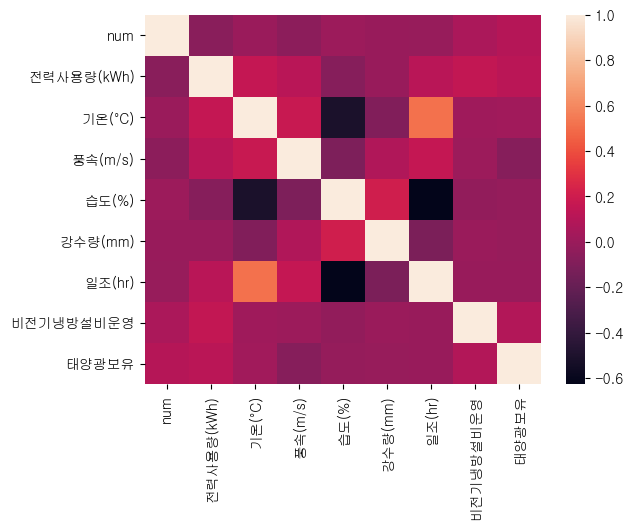

In [30]:
sns.heatmap(df.corr())

In [33]:
df1 = pd.read_csv('./data/energy2.csv', encoding='cp949')

<AxesSubplot:>

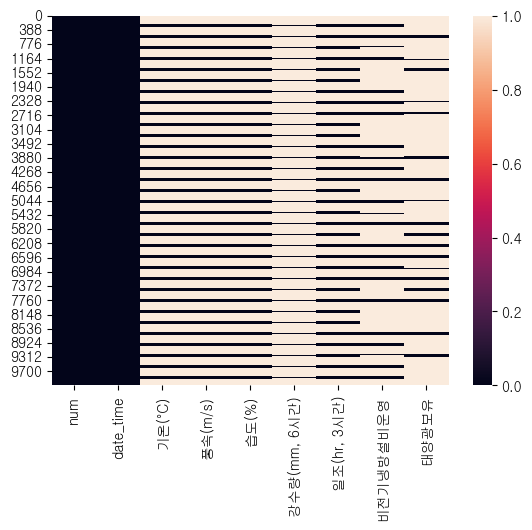

In [34]:
sns.heatmap(df1.isna())